In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

In [28]:
drive.mount("/content/drive")
file_path = '/content/drive/MyDrive/LAI/Machine_Learning_Development/citrus.csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [49]:
# check duplicated
df.duplicated().sum()

np.int64(0)

In [50]:
# check missing value
df.isna().sum()

,0
name,0
diameter,0
weight,0
red,0
green,0
blue,0


In [31]:
# distribution check
df.name.value_counts()

,count
name,
orange,5000
grapefruit,5000


Text(0.5, 1.0, 'Distribution of target class')

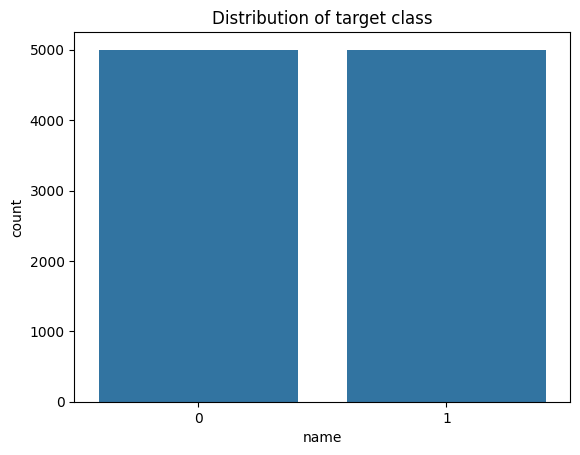

In [53]:
sns.countplot(df, x=df.name)
plt.title("Distribution of target class")

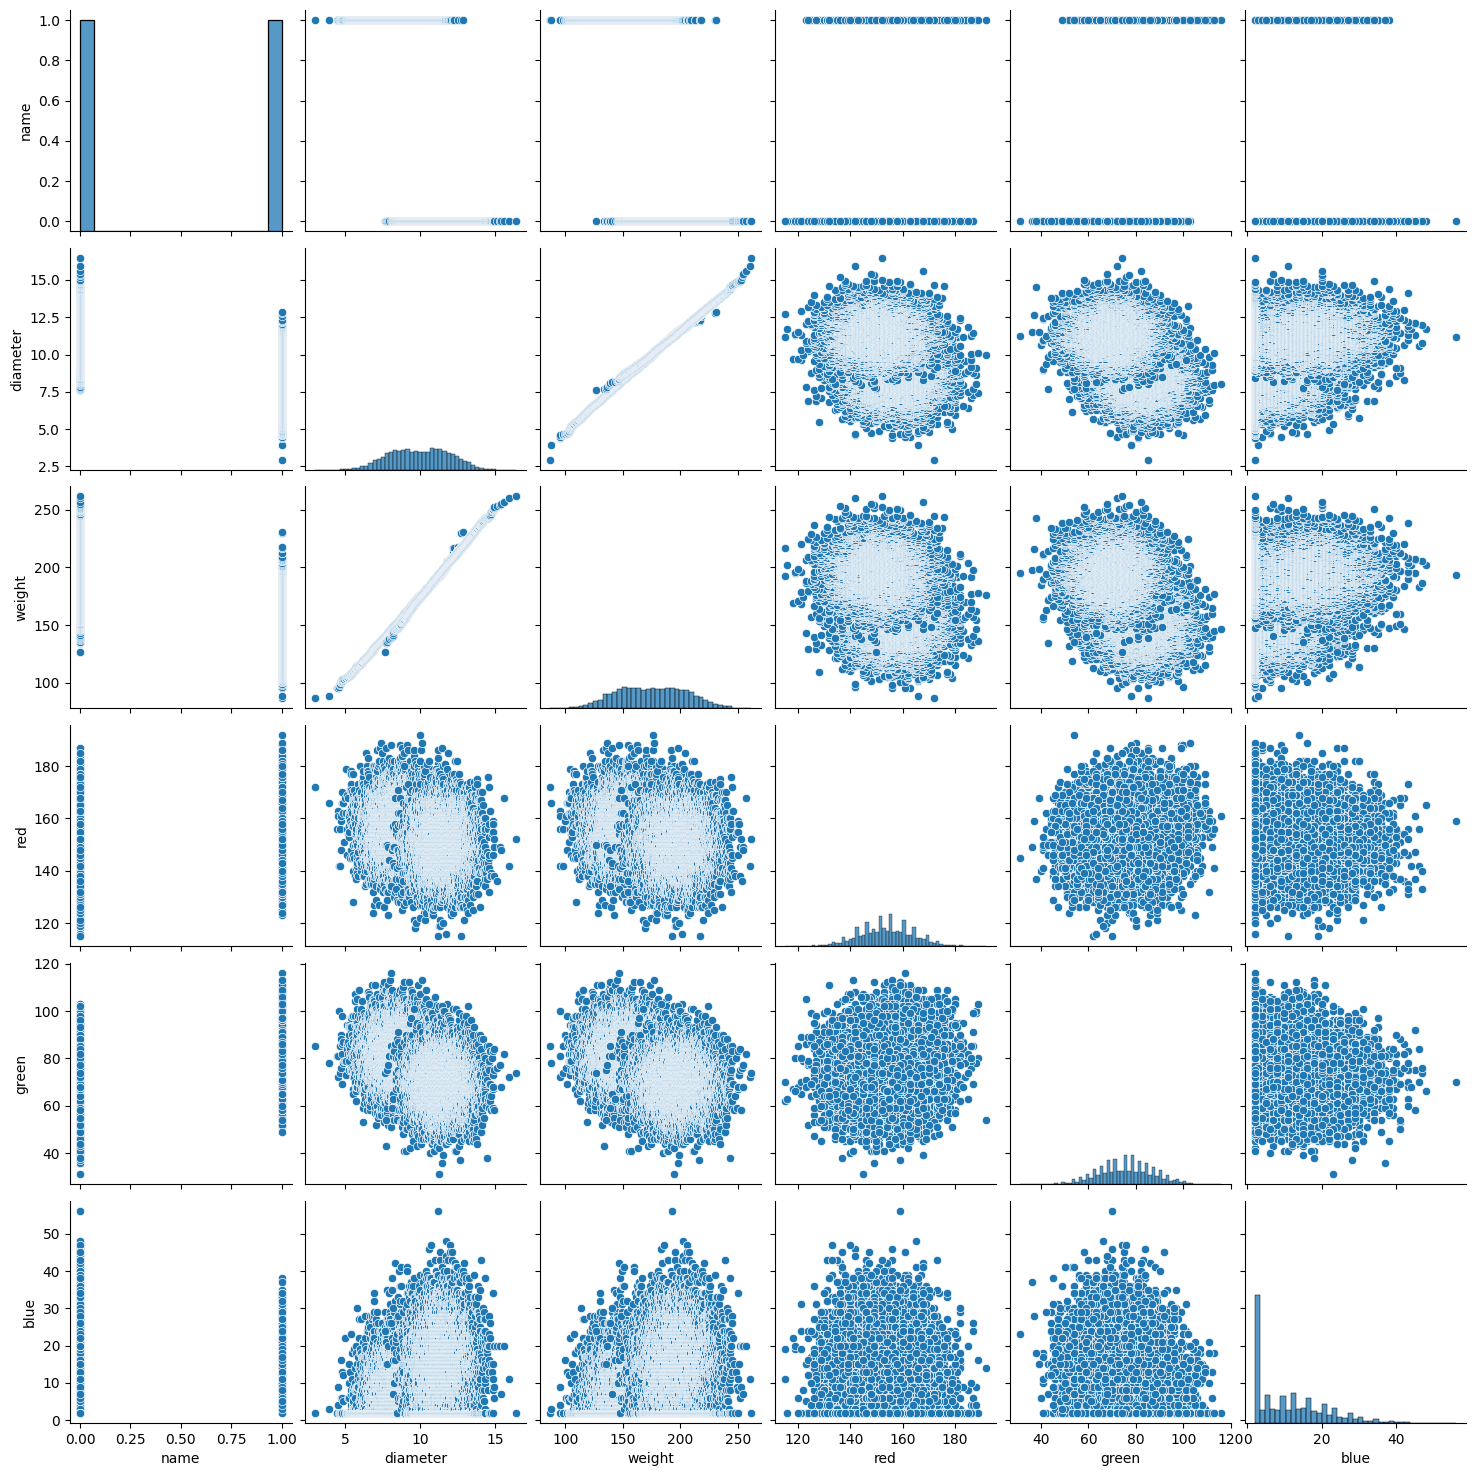

In [54]:
sns.pairplot(df)

Encoding

In [34]:
le = preprocessing.LabelEncoder()
df.name = le.fit_transform(df.name)

In [35]:
df.head()

,name,diameter,weight,red,green,blue
0,1,2.96,86.76,172,85,2
1,1,3.91,88.05,166,78,3
2,1,4.42,95.17,156,81,2
3,1,4.47,95.60,163,81,4
4,1,4.48,95.76,161,72,9


Split x & y

In [65]:
X = df.iloc[:,1:6]
y = df.iloc[:,0]
X

,diameter,weight,red,green,blue
0,2.96,86.76,172,85,2
1,3.91,88.05,166,78,3
2,4.42,95.17,156,81,2
3,4.47,95.60,163,81,4
4,4.48,95.76,161,72,9
...,...,...,...,...,...
9995,15.35,253.89,149,77,20
9996,15.41,254.67,148,68,7
9997,15.59,256.50,168,82,20
9998,15.92,260.14,142,72,11


In [66]:
y

,name
0,1
1,1
2,1
3,1
4,1
...,...
9995,0
9996,0
9997,0
9998,0


Scaling X features

In [56]:
minmax_scaler = preprocessing.MinMaxScaler()
X_scale = minmax_scaler.fit_transform(X)
X_scale

array([[0.        , 0.        , 0.74025974, 0.63529412, 0.        ],
       [0.07042254, 0.00738197, 0.66233766, 0.55294118, 0.01851852],
       [0.10822832, 0.04812589, 0.53246753, 0.58823529, 0.        ],
       ...,
       [0.93624907, 0.97133047, 0.68831169, 0.6       , 0.33333333],
       [0.96071164, 0.99216023, 0.35064935, 0.48235294, 0.16666667],
       [1.        , 1.        , 0.48051948, 0.50588235, 0.        ]])

Splitting train and test set

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.3)

Modelling

In [68]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(5,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.compile(
    optimizer = 'sgd',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [72]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9328 - loss: 0.1631
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9317 - loss: 0.1633
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9360 - loss: 0.1610
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9360 - loss: 0.1602
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9305 - loss: 0.1699
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9304 - loss: 0.1694
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9332 - loss: 0.1582
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9309 - loss: 0.1675
Epoch 9/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9298 - loss: 0.1714
Epoch 10/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9306 - loss: 0.1666
Epoch 11/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9348 - loss: 0.1655
Epoch 12/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [73]:
model.evaluate(X_test, y_test, batch_size=1)

3000/3000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9252 - loss: 0.1920


[0.19540143013000488, 0.9213333129882812]

**Kesimpulan**
*   Accuracy = 0.92
*   Loss = 0.19

Dengan nilai accuracy 0.92 dan loss function 0.19 menunjukan bahwa model ini dapat mengkalsifikasikan buah anggur dan jeruk secara cukup akurat, tidak hanya akurat model ini juga memiliki prediksi yang stabil

